## Libraries and dataset importing

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# Get the dataset and create the training and validation directories

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train_full.shape # Means 60000 images of size (28 x 28) each

(60000, 28, 28)

In [4]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Model development and Analysis

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Get the model layers
model.layers

In [9]:
weights, biases = model.layers[1].get_weights()
print(weights)

[[ 0.03220437 -0.03761706 -0.05626007 ... -0.06812624  0.02763779
  -0.04436984]
 [ 0.06387395  0.00367808  0.00726072 ...  0.02118006 -0.04197972
   0.05164386]
 [ 0.05391754  0.00035477 -0.07125422 ... -0.00984559 -0.02392947
  -0.06029352]
 ...
 [ 0.03604501 -0.00410864  0.04155029 ... -0.06073754 -0.02719728
   0.06368119]
 [-0.0421842  -0.05481084  0.00565694 ...  0.01617578  0.06135632
  -0.01478129]
 [-0.0092706  -0.04417304 -0.06695823 ... -0.03372349 -0.01429329
  -0.06990976]]


In [10]:
weights.shape

(784, 300)

In [11]:
biases.shape

(300,)

## Model compilation and Training

In [12]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer = keras.optimizers.SGD(),
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9841 - accuracy: 0.6738 - val_loss: 0.5128 - val_accuracy: 0.8314
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5045 - accuracy: 0.8255 - val_loss: 0.4399 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4536 - accuracy: 0.8435 - val_loss: 0.4140 - val_accuracy: 0.8630
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4166 - accuracy: 0.8543 - val_loss: 0.4080 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3923 - accuracy: 0.8612 - val_loss: 0.3953 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8675 - val_loss: 0.3747 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3709 - accuracy: 0.8682 - val_loss: 0.3710 - val_accuracy:

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualize the training process

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

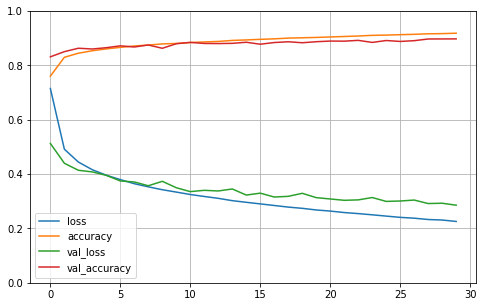

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) # 8- Length and 5 - height
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0 - 1]
plt.show()

## Evaluate the model

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 69.7090 - accuracy: 0.8340


[69.70899200439453, 0.8339999914169312]

In [20]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
# Predictions
y_pred = model.predict_classes(x_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [22]:
# Class names
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [23]:
# Actual values
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### As the values are matching hence the model made the correct predictions